<a href="https://colab.research.google.com/github/Anshit-hub/WordForThought/blob/main/Week%202/Anshit_NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
animal_data_folder = '/content/animal_data'
class_folders = os.listdir(animal_data_folder)
img_width, img_height = 75, 75
batch_size = 64
num_classes = 15

FileNotFoundError: [Errno 2] No such file or directory: '/content/animal_data'

In [74]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.2, 1.5],
    validation_split=0.2
)

In [75]:
train_generator = train_datagen.flow_from_directory(
    animal_data_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 1561 images belonging to 15 classes.


In [76]:
validation_generator = train_datagen.flow_from_directory(
    animal_data_folder,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 383 images belonging to 15 classes.


In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),


    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [82]:
model.compile(optimizer='Adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_52 (Conv2D)                   │ (None, 73, 73, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_52 (MaxPooling2D)      │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 34, 34, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_53 (MaxPooling2D)      │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 15, 15, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_54 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_55 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 15)                  │          15,375 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,453,391 (5.54 MB)

 Trainable params: 1,453,391 (5.54 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 29s 547ms/step - accuracy: 0.0698 - loss: 2.7126 - val_accuracy: 0.0767 - val_loss: 2.6148
Epoch 2/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0625 - loss: 2.6724 - val_accuracy: 0.0645 - val_loss: 2.6800
Epoch 3/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 461ms/step - accuracy: 0.1014 - loss: 2.6423 - val_accuracy: 0.1733 - val_loss: 2.5360
Epoch 4/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.4727 - val_accuracy: 0.1613 - val_loss: 2.4048
Epoch 5/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 41s 479ms/step - accuracy: 0.1831 - loss: 2.5405 - val_accuracy: 0.2074 - val_loss: 2.5004
Epoch 6/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2500 - loss: 2.3819 - val_accuracy: 0.2258 - val_loss: 2.5378
Epoch 7/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 23s 454ms/step - accuracy: 0.1809 - loss: 2.4638 - val_accuracy: 0.1818 - val_loss: 2.4119
Epoch 8/50
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2188 - loss: 2.3264 - val_accuracy: 0.1935

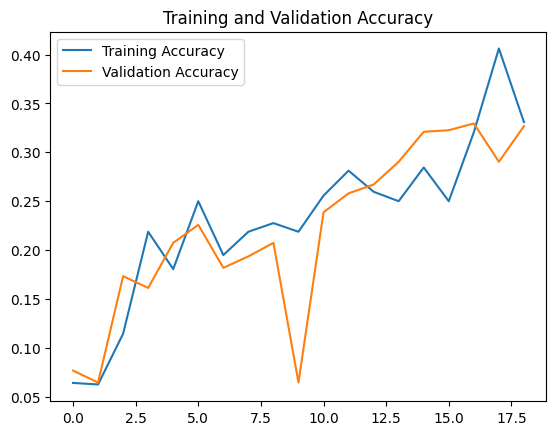

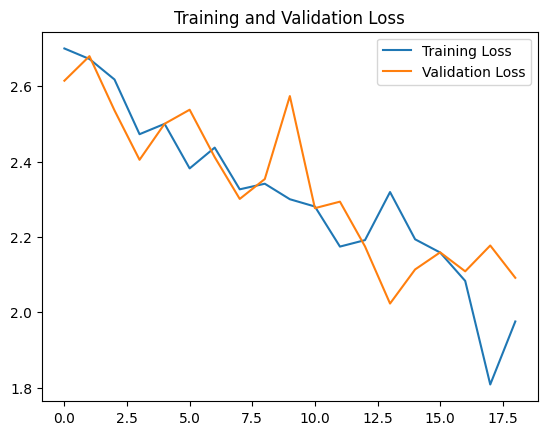

In [85]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [86]:
test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.2361 - loss: 2.2804
Test Loss: 2.1529765129089355
Test Accuracy: 0.2926136255264282


In [87]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [88]:
predictions = probability_model.predict(validation_generator, steps= validation_generator.samples // batch_size)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 167ms/step


In [89]:
predictions[0]

array([0.06336214, 0.06446633, 0.06477518, 0.06331374, 0.07223707,
       0.06274779, 0.06221019, 0.06355131, 0.07935918, 0.06356174,
       0.07241442, 0.06730718, 0.06221836, 0.07171626, 0.06675909],
      dtype=float32)

In [90]:
np.argmax(predictions[0])

8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step


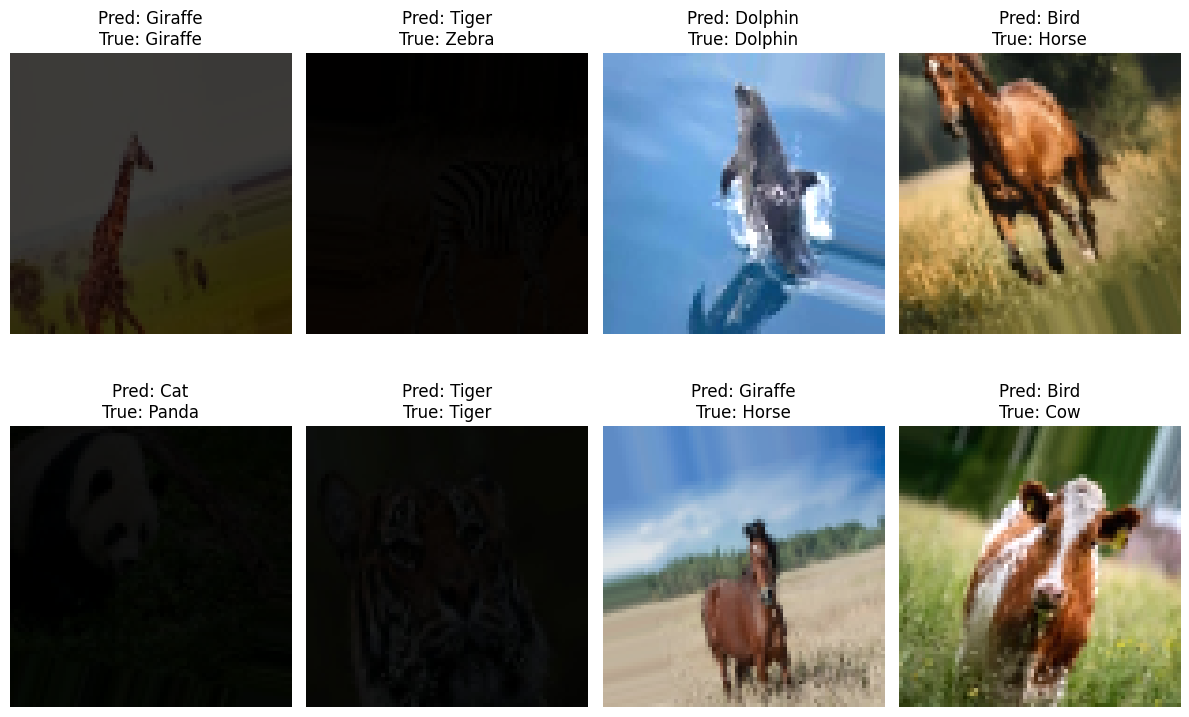

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load a batch of test images
batch_images, batch_labels = next(validation_generator)

# Get predictions for the images in the batch
predictions = model.predict(batch_images)

# Get the predicted class labels
predicted_class_indices = np.argmax(predictions, axis=1)

# Get the class labels from the generator
class_labels = list(validation_generator.class_indices.keys())

# Plot the images and display predictions
plt.figure(figsize=(12, 8))
for i in range(8):  # Display first 8 images in the batch
    plt.subplot(2, 4, i + 1)
    plt.imshow(batch_images[i])  # Display image
    plt.axis('off')  # Turn off axes

    # Display predicted class label
    predicted_label = class_labels[predicted_class_indices[i]]
    true_label = class_labels[np.argmax(batch_labels[i])]
    plt.title(f'Pred: {predicted_label}\nTrue: {true_label}')

plt.tight_layout()
plt.show()
